<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB4-04%20Biomedical%20Imaging%20and%20Tensorflow_(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biomedical Imaging and Tensorflow II:
# Create a DataSet from TFDS

## 1. Introduction
The previous lecture a modeled Fashion-MNIST data based on a ***``Keras dataset``*** was used. However, _`Keras does not provide biomedical images datasets for studying and practicing`_. Instead, TensorFlow provides TFDS. In this way, _`we can load data as a` [***`TensorFlow dataset (TFDS)`***](https://www.tensorflow.org/datasets) `and convert it into NumPy arrays for very easy processing`_.

For this experiment, we load the _`colorectal_histology dataset`_ instead of Fashion-MNIST. Once the data is loaded and converted to NumPy, the input pipeline phases are the same as in the previous Lecture.

### What is Colorectal Histology?

Colorectal histology refers to the `microscopic study of tissue samples taken from the colon and rectum`. It is commonly used to diagnose and understand diseases affecting these areas, such as `colorectal cancer, inflammatory bowel disease (IBD), and other disorders`. The process involves examining tissue samples (biopsies) `under a microscope to observe cellular structures`, tissue architecture, and pathological features. **`Histopathologists`** identify abnormalities such as `cancerous cells, polyps, inflammation, or other changes indicative of disease`.

### Purpose of Colorectal Histology

The `primary goal` of colorectal histology is to **`diagnose diseases`** and **`assess tissue health`**. This method helps doctors determine:
- Whether a patient has conditions like **[`colorectal cancer`](https://www.mayoclinic.org/diseases-conditions/colon-cancer/symptoms-causes/syc-20353669)** or **[`Crohn's disease`](https://www.nhs.uk/conditions/crohns-disease/)**.
- The **`stage`** and **`severity`** of the disease.
- The most appropriate **`treatment strategy`**.

By analyzing cell structures and the tissue microenvironment, medical professionals can make informed decisions on patient care.



### Deep Learning in Colorectal Histology
In colorectal histology, deep learning can be applied to **`automatically detect and classify disease`** from tissue images, providing faster and often more accurate results than traditional human analysis.


1. **`Cancer Detection`**: Deep learning models can be trained to identify cancerous cells in colorectal tissue samples. By using large datasets of histological images, these models `can learn to distinguish between normal and abnormal tissue with high accuracy`.
   

2. **`Pattern Recognition for Disease Classification`**: Deep learning models `can also recognize patterns in histological images to classify various diseases (such as different types of polyps or inflammatory diseases)`. For instance, convolutional neural networks (CNNs) are commonly used for this purpose.
   

3. **`Quantification of Cellular Features`**: Deep learning algorithms can quantify features such as **`nuclei`** or **`glandular structures`** in histology images. This allows for objective and consistent measurement of `disease progression`, which can be used for both diagnostic purposes and to track the response to treatment.


In conclusion, `colorectal histology plays a vital role in diagnosing colorectal diseases, and deep learning is transforming this field by enabling automated and more accurate analysis of tissue samples`. As these technologies evolve, we can expect to see AI systems increasingly assist clinicians in diagnosing and treating colorectal diseases.





### Load Dataset and Create Train and Test Sets.


---
**Create a training set as NumPy arrays in a single batch from [`colorectal_histology dataset`](https://www.tensorflow.org/datasets/catalog/colorectal_histology?hl=es):** (Time = 15m.)

---



This code uses the _**``TensorFlow Datasets (TFDS) library``**_ to load and convert a dataset of colorectal histology images into NumPy arrays. Here's a explanation of the code:

1. **`tfds.load(...)`**: This function loads a specified dataset from the TensorFlow Datasets library.
   - **`'colorectal_histology'`**: The name of the dataset to load. This dataset consists of histology images of colorectal tissues.
   - **`split='train'`**: This specifies that we want to load the training split of the dataset.
   - **`batch_size=-1`**: This argument is used to load the entire dataset as a single batch. Setting `batch_size` to `-1` ensures that all data is loaded into memory at once.
   - **`as_supervised=True`**: When set to `True`, the dataset is returned in a tuple format `(image, label)`, making it easier to work with supervised learning tasks.
   - **`try_gcs=True`**: This option enables the loading of the dataset from Google Cloud Storage (GCS) if it's available. This can be helpful for faster data access and larger datasets.

2. **`tfds.as_numpy(...)`**: This function converts the TensorFlow Dataset into NumPy arrays.
   - The output of `tfds.load(...)` is passed into `tfds.as_numpy(...)` to convert the _``TensorFlow tensors into NumPy arrays``_, which are more commonly used in Python and more compatible with many libraries.

3. **`image_train, label_train = ...`**: This assigns the resulting NumPy arrays to the variables `image_train` and `label_train`.
   - `image_train` will hold the image data from the dataset.
   - `label_train` will hold the corresponding labels for the images.

The _``training set contains 5000 150 × 150 x 3 images``_. The *3* dimension indicates that the data is a color image. A **grayscale** image is one in which the only colors are shades of gray. That is, the image only contains luminance (or brightness) information and no color information.

>**Note**: The `'colorectal_histology'` dataset has only a training split and does not have a separate split for testing.


In [ ]:
# Install the tensorflow_datasets library quietly (without showing installation messages).
# We use '%%time' to measure the execution time of the code.
%%time
%pip install -q tensorflow_datasets

# Import the tensorflow_datasets library, which allows loading TensorFlow datasets.
import tensorflow_datasets as tfds

# Load the 'colorectal_histology' dataset. This dataset contains histology images of the colon.
# Parameters:
# - split='train': selects the training set.
# - batch_size=-1: returns all data in a single batch, instead of dividing into smaller batches.
# - as_supervised=True: returns a tuple of (image, label) instead of a dictionary with additional data.
# - try_gcs=True: attempts to use Google Cloud Storage (GCS) if available to load the data.
image_train, label_train = tfds.as_numpy(
    tfds.load(
        'colorectal_histology',
        split='train',
        batch_size=-1,
        as_supervised=True,
        try_gcs=True
    )
)

# Check the type of the loaded data (image_train) and its shape (image_train.shape).
# This is useful to ensure that the data has been loaded correctly and has the expected format.
type(image_train), image_train.shape


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]


---
**Create the corresponding test set:**

---

Next code produces error.


``` python
image_test, label_test = tfds.as_numpy(
    tfds.load(
        'colorectal_histology', split='test',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_test), image_test.shape
```
But this code give error because split is not an automatic set in this dataset.

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-4-a2a47f7dc17c> in <cell line: 1>()
      1 image_test, label_test = tfds.as_numpy(
----> 2     tfds.load(
      3         'colorectal_histology', split='test',
      4         batch_size=-1, as_supervised=True,
      5         try_gcs=True))

16 frames
/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/core/splits.py in _rel_to_abs_instr(rel_instr, split_infos)
    778   split = rel_instr.split_name
    779   if split not in split_infos:
--> 780     raise ValueError(
    781         f'Unknown split {split!r}. Should be one of {list(split_infos)}.'
    782     )

ValueError: Unknown split 'test'. Should be one of ['train'].
```
We need manually split the dataset.



---
**Manually split the dataset**

---

Adding `with_info=True` to the `tfds.load` function modifies the behavior of the code to also _``return metadata about the dataset``_. Here’s how the updated line of code would look and what each part means:

```python
(image_train, label_train), info = tfds.as_numpy(
    tfds.load(
        'colorectal_histology', split='train',
        batch_size=-1, as_supervised=True,
        with_info=True,
        try_gcs=True))
```



We are going to use 20 percent of the train images as test images. ``test_size=0.2``

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset using as_supervised=True to get (image, label) tuples instead of dictionaries
dataset = tfds.load('colorectal_histology', split='train', as_supervised=True)

# Convert the dataset to NumPy arrays
data = tfds.as_numpy(dataset)

# Separate images and labels directly from the tuples in list form
images = []
labels = []

for image, label in data:
    images.append(image)
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data: 80% for training, 20% for testing
image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify the shapes of the training and test sets
print("Train Images Shape:", image_train.shape)
print("Test Images Shape:", image_test.shape)


### Inspect Train and Test Shapes



---
**Get training shapes:**

---

In [ ]:
image_train.shape, label_train.shape

---
**Get test shapes:**

---

In [ ]:
image_test.shape, label_test.shape

### Display Some Images

---
**Display one sample image**

---

Si lo que quiero es una imagen aleatoria podemos _barajar_ el batch.

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with as_supervised=True to get (image, label) tuples, and shuffle it
dataset = tfds.load('colorectal_histology', split='train', as_supervised=True).shuffle(buffer_size=1000)

# Take one random example from the shuffled dataset
image, label = next(iter(dataset))

# Display the image
plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()


If I want the first image

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with as_supervised=True to get (image, label) tuples
dataset = tfds.load('colorectal_histology', split='train', as_supervised=True)

# Take one example from the dataset (the first one)
image, label = next(iter(dataset))

# Display the image
plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()


**Label: 4** is very confussing. We need take a semantic label.

You can load the dataset with `with_info=True` to access the dataset's metadata. In this case `'class names'`.

---
**Get information about the classes**

---


In [ ]:
import tensorflow_datasets as tfds

# Load the dataset with info
_, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Get the class names
classes = info.features['label'].names

# Print the class names
print("Classes:", classes)


---

**Display one image sample and its `semantic` label**

---



In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with info and as_supervised=True to get (image, label) tuples
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True, as_supervised=True)

# Get the class names
classes = info.features['label'].names

# Print the class names
print("Classes:", classes)

# Display an image from the dataset with its label
# Take one example from the dataset
image, label = next(iter(dataset))

# Show the image with its class name
plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.axis('off')
plt.show()



---
**Display one sample for each class**

---

To get one image and its corresponding class for each class in a dataset using TensorFlow Datasets (TFDS), you can *`iterate through the dataset and collect one example for each class`*. Here's how you can do it:
1. Loads the 'colorectal_histology' dataset along with its metadata.
2. Initializes a list to store one example per class.
3. Iterates through the dataset, storing one image and its label for each class.
4. Once all classes have at least one example, it stops iterating.
5. Uses matplotlib to plot the images and display their labels.

Make sure to adjust the plotting layout according to the number of classes to avoid any layout issues. The `plt.subplots` call in this example assumes there are an even number of classes and lays them out in two rows. Adjust the number of rows and columns based on your dataset.




In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 1. Load the dataset with info and as_supervised=True to get (image, label) tuples
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True, as_supervised=True)

# Get the class names
classes = info.features['label'].names

# 2. Initialize a list to store one example per class (None initially for each (8) class)
class_examples = [None] * info.features['label'].num_classes


# 3. Iterate through the dataset and collect one example for each class
for image, label in dataset:
    label_index = label.numpy() # Get the label as an integer index
    # If we don't have an example for this class yet, save it
    if class_examples[label_index] is None:
        class_examples[label_index] = (image, classes[label_index]) # Use indexing to access the class name

    # Stop the loop once we have one example for each class
    if all(class_examples):
        break  # 4. Stop once we have one example per class

# 5. Plot the images with their labels
num_rows = 2
num_cols = len(class_examples) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for idx, (image, label) in enumerate(class_examples):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    ax.imshow(image)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 2. Scale (Resize and Normalize)

---
**Resize and Normalize (Scale)**

---

Since NumPy array values are float, _`divide them by 255 to normalize the image pixels (0 to 1) and resize to 64 x 64 pixels`_.

In [ ]:
import tensorflow as tf

train_sc = tf.image.resize(image_train, (64, 64)).numpy() / 255.0
test_sc = tf.image.resize(image_test, (64, 64)).numpy() / 255.0

train_sc[0].shape, test_sc[0].shape



---
**Verify normalization**

---

This code will output the _`minimum and maximum values`_ of the scaled training and testing data. If the scaling is correct, the minimum value should be 0.0 (or very close to it), and the maximum value should be 1.0 (or very close to it).



In [ ]:
# Verify the scaling or normalization
print("Training data - min:", np.min(train_sc), "max:", np.max(train_sc))
print("Testing data - min:", np.min(test_sc), "max:", np.max(test_sc))



---
**Inspect specific values**

---

For a more detailed check, you can also inspect the values of a few specific pixels or entire images.

In [ ]:
# Check a few pixels in the scaled training data
print("Sample pixel values from training data:")
print(train_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(train_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(train_sc[0, 0, 2])  # Pixel value of the third pixel in the first image

# Check a few pixels in the scaled testing data
print("Sample pixel values from testing data:")
print(test_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(test_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(test_sc[0, 0, 2])  # Pixel value of the third pixel in the first image


## 3. Prepare Data for TensorFlow Consumption


---
**Numpy to Tensor**

---

Slice NumPy arrays into TensorFlow datasets:

In [ ]:
import tensorflow as tf

train_crht = tf.data.Dataset.from_tensor_slices(
    (train_sc, label_train))
test_crht = tf.data.Dataset.from_tensor_slices(
    (test_sc, label_test))

---
**Inspect the tensorflow dataset**

---

In [ ]:
train_crht, test_crht

## 4. Build the Consumable Input Pipeline

---
**Initialize parameters, shuffle training data, and batch and prefetch training and test data:**

---

In [ ]:
batch_size = 10  # Set the batch size to 10, which determines how many samples will be processed at once
shuffle_size = 10000  # Set the shuffle buffer size to 10,000 to randomize the order of samples within this buffer

# Shuffle the training dataset with the specified shuffle buffer size, batch the data,
# and prefetch 1 batch at a time to improve efficiency during training
train_crhtds = train_crht.shuffle(shuffle_size).batch(batch_size).prefetch(1)

# Batch the test dataset with the specified batch size and prefetch 1 batch at a time.
# Since this is test data, it doesn’t need shuffling, only batching and prefetching for efficiency
test_crhtds = test_crht.batch(batch_size).prefetch(1)


---

**Inspect tensors (normalization)**

---

In [ ]:
train_crhtds, test_crhtds

### Build the Model
Earlier, we imported requisite libraries. Since they are already in memory, we don’t need to import them again (assuming that we are using the same notebook).

---

**Get tensor shape**

---

In [ ]:
np_shape = train_sc[0].shape
np_shape

---
**Create the model**

---

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

model = Sequential([
  Input(shape=np_shape),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(8, activation='softmax')
])

model = Sequential([
  Flatten(input_shape=img_shape),
  Dense(128, activation='relu'),
  Dropout(0.4),
  Dense(10, activation=None)
])

### Other Models
```
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Define the input shape
np_shape = train_sc.shape[1:]

# Improved model
model = Sequential([
    Flatten(input_shape=np_shape),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Assuming 8 classes in the dataset
])
```

and other

```
from tensorflow.keras.layers import Conv2D, MaxPooling2D

num_classes = len(classes)

model = tf.keras.Sequential([
  Conv2D(32, 3, activation='relu',
         input_shape=np_shape),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

```

These models were seen in later NBs.

## 5. Compile and Train the Model
Compile with *`sparse categorical cross-entropy`*. Notice that we **don't** set *`from_logits=True`* because we use *`softmax`* activation in the output layer of the model _``to produce a probability distribution from the logits``_. The **softmax** activation function acts on a vector to increase the difference between the largest component and all others and normalizes the vector to have a sum of 1 so that it can be interpreted as a vector of probabilities. It is used as the last step in classifiers:

In [ ]:
from tensorflow.keras.optimizers import Adam


model.compile(optimizer = Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
**Show the model architecture**

---

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │       6,291,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,296,072 (24.02 MB)

 Trainable params: 6,296,072 (24.02 MB)

 Non-trainable params: 0 (0.00 B)

Plot the model

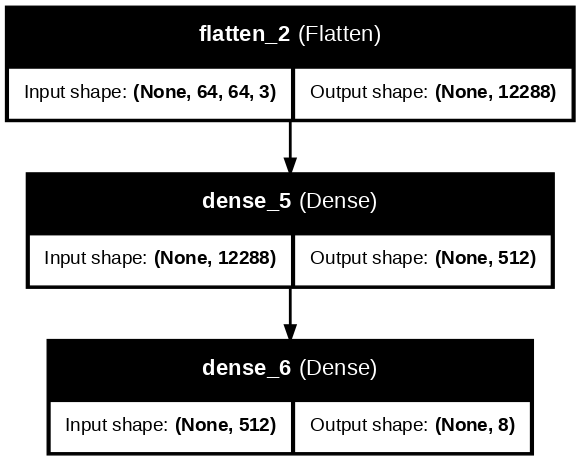

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualizar el modelo en formato gráfico
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=100)


---
**Train the model:** This may take a few minutes.

---

In [ ]:
%%time

# Train the model
epochs = 50
history = model.fit(train_crhtds, epochs=epochs, verbose=1,
                     validation_data=test_crhtds)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2572 - loss: 5.2040 - val_accuracy: 0.3550 - val_loss: 1.4570
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4379 - loss: 1.2903 - val_accuracy: 0.4640 - val_loss: 1.1403
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4815 - loss: 1.1428 - val_accuracy: 0.4520 - val_loss: 1.2285
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5161 - loss: 1.1122 - val_accuracy: 0.5250 - val_loss: 1.0902
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5333 - loss: 1.0687 - val_accuracy: 0.4960 - val_loss: 1.1181
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5602 - loss: 0.9979 - val_accuracy: 0.5820 - val_loss: 1.0710
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5563 - loss: 0.9882 - val_accuracy: 0.5080 - val_loss: 1.0902
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5615 - loss: 0.9758 - val_accuracy: 0.

---
**Plots metrics**

---

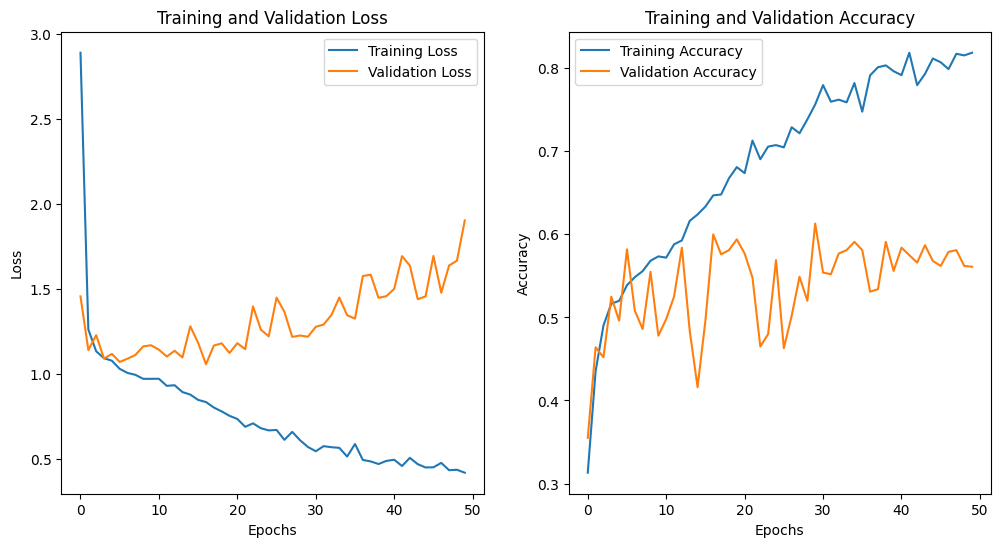

In [ ]:
import matplotlib.pyplot as plt

# Access the metrics stored in history.history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

---
**Evaluate**

---

Test Loss: 1.9041694402694702
Test Accuracy: 0.5609999895095825


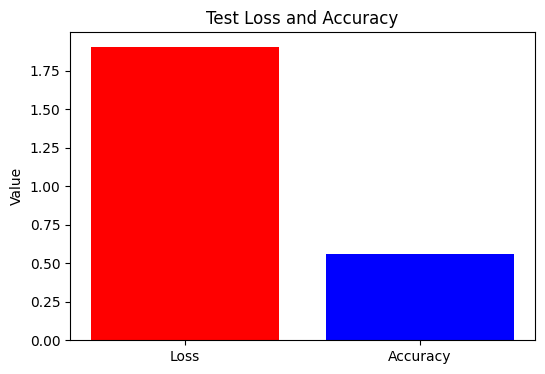

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_crhtds, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test data
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'blue'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()


---
**Obtain Confusion Matrix**

---

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Length of y_true: 1000
Length of y_pred_classes: 1000
Unique values in y_true: [0 1 2 3 4 5 6 7]
Unique values in y_pred_classes: [0 1 2 3 4 5 6 7]


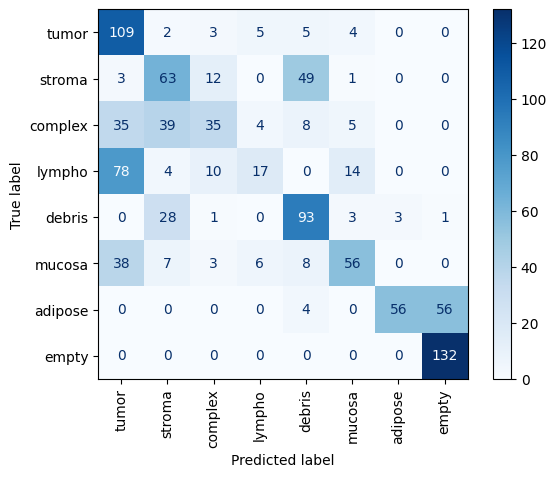

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming model and test_fm are already defined and loaded

# Make predictions on the test set
y_pred = model.predict(test_crhtds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Use argmax to get the class with the highest probability

# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_crhtds], axis=0)

# Print lengths to confirm they match
print("Length of y_true:", len(y_true))
print("Length of y_pred_classes:", len(y_pred_classes))

# Check unique values
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))

# Define class labels
classes = info.features['label'].names

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

---
**Improve the model**

---

The _**``Batch Normalization``**_ layer is a technique used in deep learning _``to improve the training speed and performance of neural networks``_. It normalizes the inputs to a layer for each mini-batch, which helps reduce internal covariate shift—this refers to changes in the distribution of network activations as the parameters are updated during training.

### How it works:
When using Batch Normalization, _``each mini-batch of data is normalized by adjusting the activations based on their mean and variance``_:

1. **``Normalize activations``**:
   For each feature in the batch, _``the layer subtracts the batch mean and divides by the batch standard deviation``_:
   $$ \hat{x}_i = \frac{x_i - \mu_{\text{batch}}}{\sigma_{\text{batch}}} $$

   Where $ x_i $ is the input, $ \mu_{\text{batch}} $ is the mean, and $ \sigma_{\text{batch}} $ is the standard deviation calculated from the batch of data.

2. **``Scale and shift``**:
   After normalization, _``the layer applies two learned parameters, a scale factor $ \gamma $ and a shift factor $ \beta $, to allow the network to control the normalized values``_:
   $$ y_i = \gamma \hat{x}_i + \beta $$

   These parameters are trainable and allow the model to adaptively scale and shift the normalized values.

### Benefits:
1. _**`Faster convergence`**_:
   By reducing the internal covariate shift, Batch Normalization helps the network converge faster during training. This allows you to use higher learning rates, speeding up training.

2. _**`Reduces dependency on initialization`**_:
   It makes the training less sensitive to the initial weights of the model.

3. _**`Acts as a regularizer`**_:
   Batch Normalization can reduce the need for other regularization techniques like Dropout because it introduces some noise during training (since it's based on mini-batch statistics).

_``It is usually placed after a linear transformation (like a Dense or Conv layer) and before the activation function``_.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, BatchNormalization

model = Sequential([
  Input(shape=np_shape),
  Flatten(),
  Dense(512, activation='relu'),
  BatchNormalization(),
  Dense(256, activation='relu'),
  BatchNormalization(),
  Dense(8, activation='softmax')
])

---
**Compile the enhanced model**

---

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
**Train the enhanced model**

---

In [ ]:
epochs = 50
history = model.fit(train_crhtds, epochs=epochs, verbose=1,
                     validation_data=test_crhtds)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4200 - loss: 1.3866 - val_accuracy: 0.3460 - val_loss: 1.7528
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5037 - loss: 1.1240 - val_accuracy: 0.3750 - val_loss: 1.4146
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5247 - loss: 1.1408 - val_accuracy: 0.4700 - val_loss: 1.0960
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5374 - loss: 1.1056 - val_accuracy: 0.4190 - val_loss: 1.6650
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5656 - loss: 1.0649 - val_accuracy: 0.3820 - val_loss: 1.5907
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5726 - loss: 1.0200 - val_accuracy: 0.4210 - val_loss: 1.3437
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6178 - loss: 0.9240 - val_accuracy: 0.2250 - val_loss: 2.9326
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6565 - loss: 0.8470 - val_accuracy: 0.

---
**Plot the metrics for the enhanced model**

---

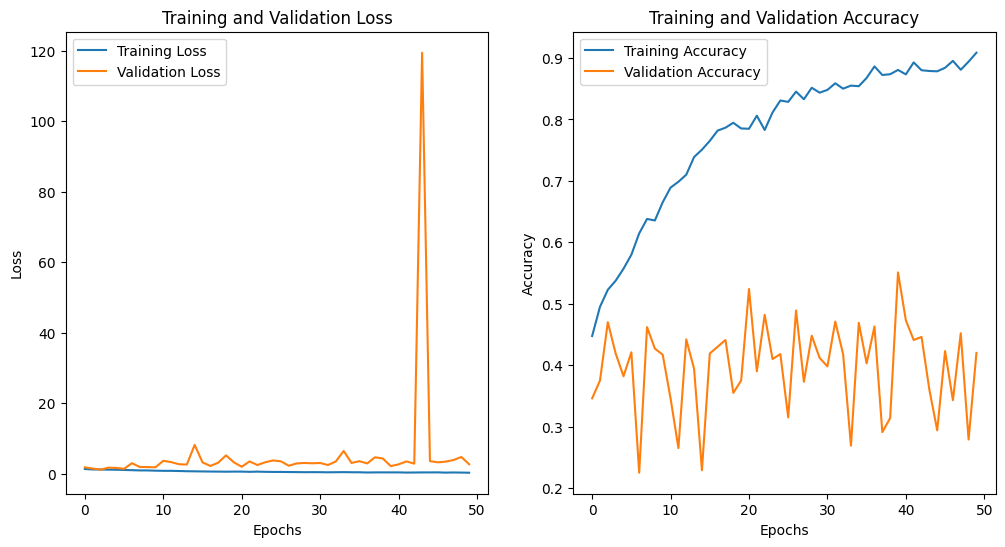

In [ ]:
import matplotlib.pyplot as plt

# Access the metrics stored in history.history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## 6. Evaluate the model

To evaluate the model with the **test set** and visualize its performance, you can use the `evaluate()` method in Keras _``to compute the loss and metrics on the test data``_. Then, you can plot the results using matplotlib.

---
**Evaluate**

---

This code snippet will _``evaluate the trained model on the test set``_, print the test loss and accuracy, and then plot them using a bar plot. The red bar represents the test loss, and the blue bar represents the test accuracy. This visualization provides a quick overview of the model's performance on the test data.

Test Loss: 2.6439828872680664
Test Accuracy: 0.41999998688697815


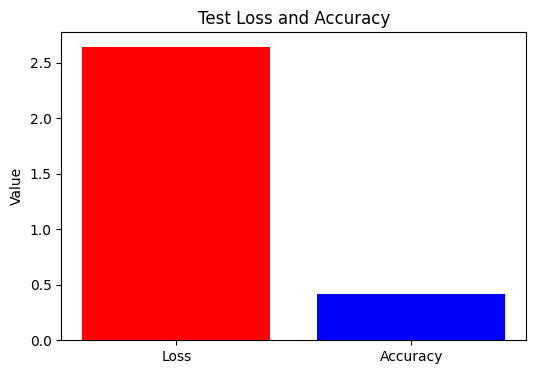

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_crhtds, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test data
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'blue'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()


---
**Obtain Confusion Matrix**

---

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Length of y_true: 1000
Length of y_pred_classes: 1000
Unique values in y_true: [0 1 2 3 4 5 6 7]
Unique values in y_pred_classes: [0 1 2 3 4 5 6 7]


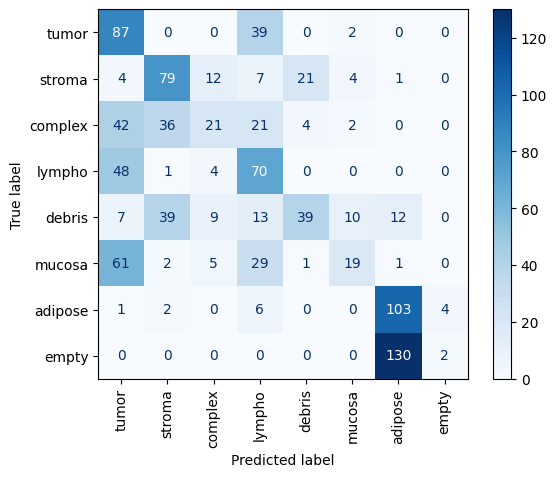

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming model and test_fm are already defined and loaded

# Make predictions on the test set
y_pred = model.predict(test_crhtds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Use argmax to get the class with the highest probability

# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_crhtds], axis=0)

# Print lengths to confirm they match
print("Length of y_true:", len(y_true))
print("Length of y_pred_classes:", len(y_pred_classes))

# Check unique values
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))

# Define class labels
classes = info.features['label'].names

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

A confusion matrix provides a comprehensive overview of a model's performance, revealing not only the number of correct and incorrect predictions but also the specific classes that are being confused. This detailed insight can guide further model refinement and tuning.

## `NOTEBOOK PRACTICE 4`

---
Modify this notebook as necessary to improve the performance of the model you create. Try to use a metric that combines partial metrics to demonstrate that your model classifies better than the baseline model shown in this notebook. You can modify the following aspects:

---

### Instructions to Improve the Notebook (research these yourself):

ChatGPT can be a great ally. Use it to your advantage.

1. **Training**: Limit the training to a maximum of 100 epochs.
2. **Dataset**: You can adjust the size and batch size of the dataset.
3. **Model Layers**: You can use as many layers as you like, but you can only use some or all of the following: flatten, dense, batchnormalization and dropout layers.
4. **Optimizer**: You may change the optimizer and the loss function, but not the evaluation metric.
5. **Warning**: Be careful not to exceed memory limits for Google Colab.
6. **Evaluation**: Create a Confusion Matrix and a Multiclass ROC Curve.

Feel free to modify and adapt your NB as needed to suit your learning objectives and preferences.

Happy coding!